In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 124s 28us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)
train_labels
test_images.shape
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

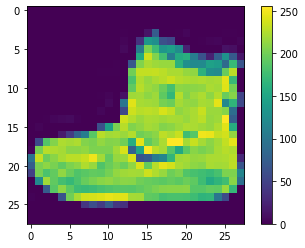

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

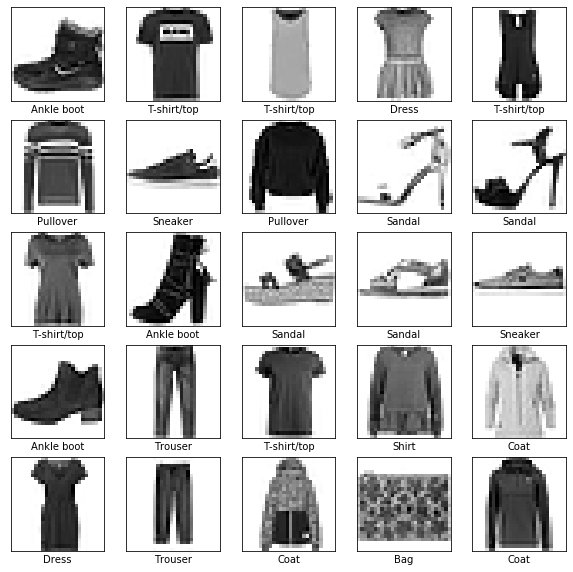

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=5) #Training model

Epoch 1/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.5030 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3786 - acc: 0.8624
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3381 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3111 - acc: 0.8859
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2939 - acc: 0.8916


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels) #Evaluating accuracy

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3498 - acc: 0.8766
Test accuracy: 0.8766


In [18]:
predictions = model.predict(test_images) #Making predictions

In [21]:
predictions[0]

array([1.15960165e-05, 2.56355577e-07, 1.74556192e-06, 1.66078576e-06,
       1.78392065e-06, 5.14864922e-03, 4.44666375e-06, 1.08005658e-01,
       2.94930396e-05, 8.86794686e-01], dtype=float32)

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

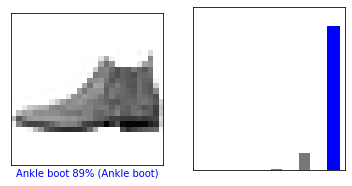

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

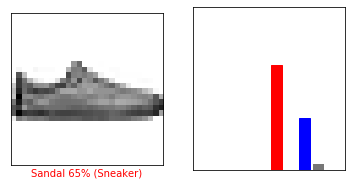

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

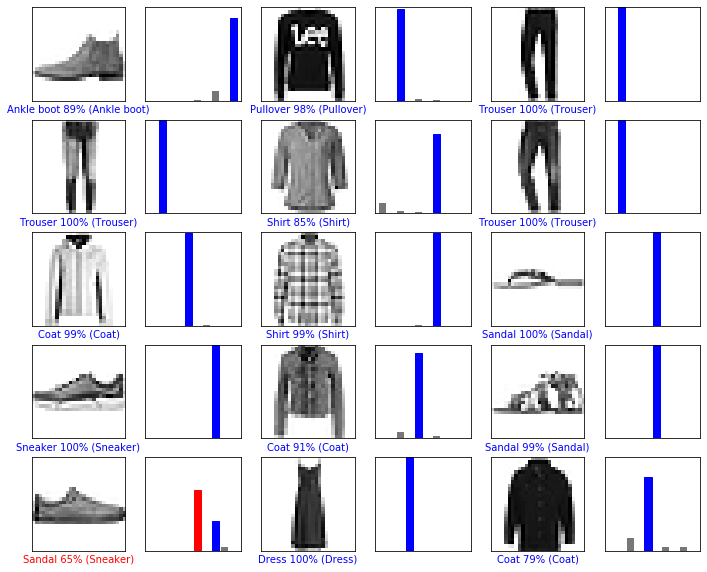

In [25]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [26]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.1596006e-05 2.5635558e-07 1.7455619e-06 1.6607858e-06 1.7839207e-06
  5.1486492e-03 4.4466638e-06 1.0800563e-01 2.9493040e-05 8.8679469e-01]]


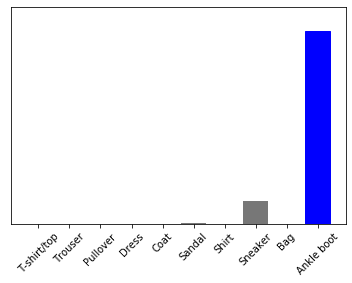

In [29]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [30]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
